In [1]:
import pandas as pd

df = pd.read_csv("Dataset.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
print(df.shape)

df.isnull().sum()

(284807, 31)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
print(df['Class'].value_counts())

print('Genuine Transactions: {}'.format(len(df[df['Class'] == 0])))                                 
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))

a = df[df['Class'] == 0]
b = df[df['Class'] == 1]

Class
0    284315
1       492
Name: count, dtype: int64
Genuine Transactions: 284315
Fraud Cases: 492


<Axes: xlabel='Class', ylabel='Class'>

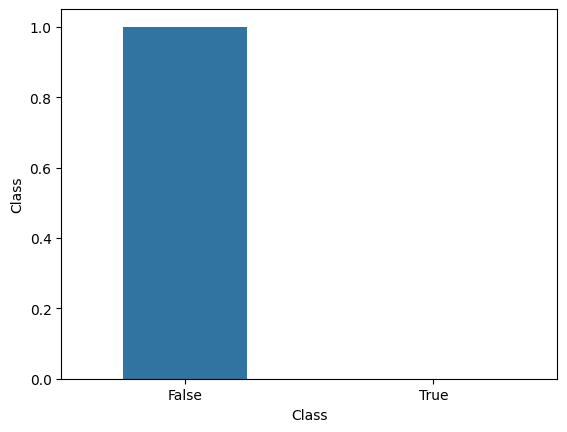

In [4]:
import seaborn as sns

sns.barplot(x = df['Class']==0, y = df['Class']==1, width=0.5)

<Figure size 800x500 with 0 Axes>

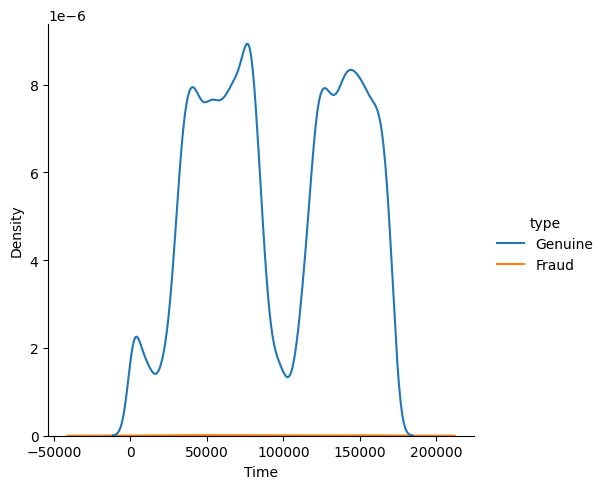

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))
fig = pd.concat([a.assign(type='Genuine'), b.assign(type='Fraud')])
sns.displot(data=fig, x='Time', hue='type', kind='kde', legend=True)
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

C:\Users\arnab\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [11]:
model.score(X_test, y_test)

0.9753266623287551

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Precision: 0.9818366185156194
Recall: 0.9686710193765796
F1-score: 0.9752093861540092


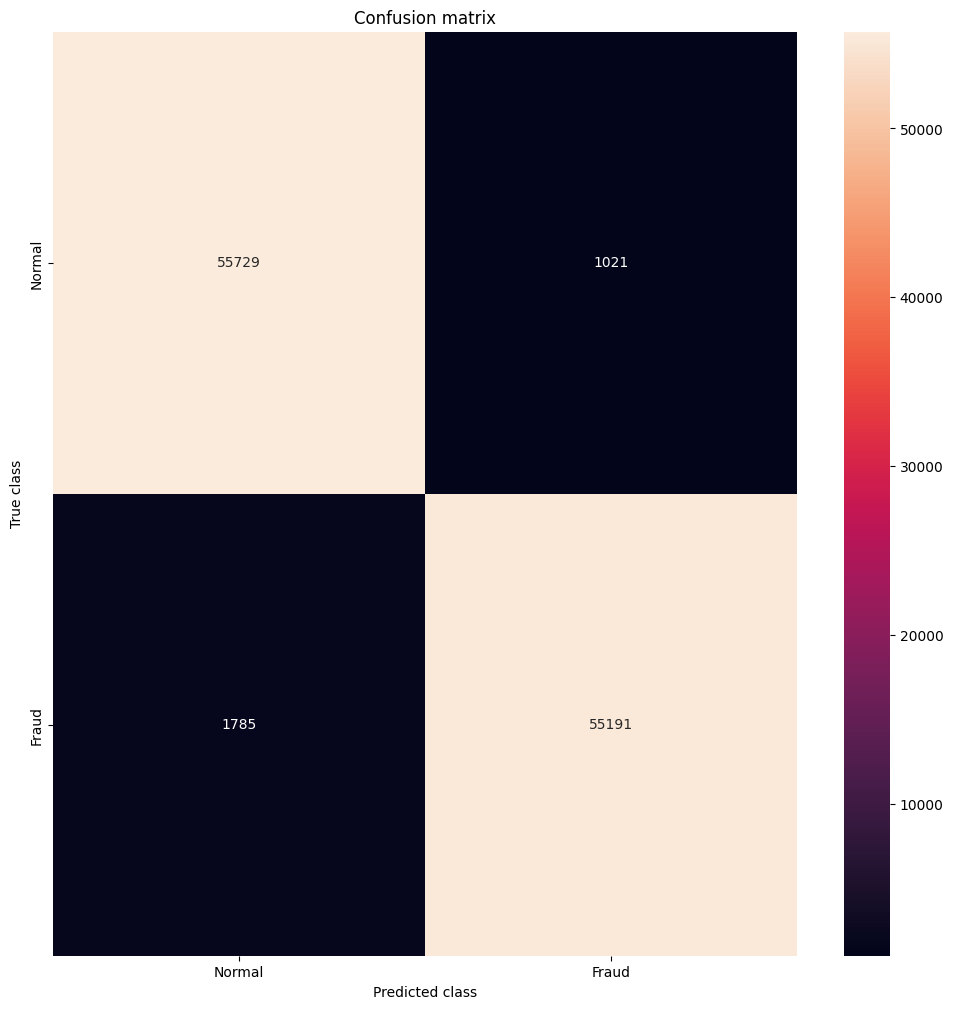

In [14]:
from sklearn.metrics import confusion_matrix

lables = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels= lables, 
            yticklabels= lables, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
